In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow import keras
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras.layers import Dense, BatchNormalization, Embedding, LSTM
from keras.metrics import Accuracy
from keras import utils
from keras import callbacks
from sklearn.model_selection import train_test_split
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

In [ ]:
df

,Data,Label
0,Human evolution is the evolutionary process wi...,en
1,This process involved the gradual development ...,en
2,The study of human evolution involves several ...,en
3,Primates diverged from other mammals about 85 ...,en
4,Primates produced successive clades leading to...,en
...,...,...
89995,Katika kipindi cha miezi michache tangu kurudi...,sw
89996,Mwisho wa mwezi wa Machi 1979 wananchi wengi w...,sw
89997,Katika mwezi wa Desemba katiba mpya ya Jamhuri...,sw
89998,Tangu mwaka 1923 Iran ilitawaliwa na wafalme w...,sw


In [ ]:
df.head(10)

,Data,Label
0,Human evolution is the evolutionary process wi...,en
1,This process involved the gradual development ...,en
2,The study of human evolution involves several ...,en
3,Primates diverged from other mammals about 85 ...,en
4,Primates produced successive clades leading to...,en
5,African and Asian hominids (including oranguta...,en
6,Hominins (including the Australopithecine and ...,en
7,The Homo genus is evidenced by the appearance ...,en
8,The evolutionary history of primates can be tr...,en
9,One of the oldest known primate-like mammal sp...,en


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    90000 non-null  object
 1   Label   90000 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [ ]:
df.shape

(90000, 2)

In [ ]:
df.columns

Index(['Data', 'Label'], dtype='object')

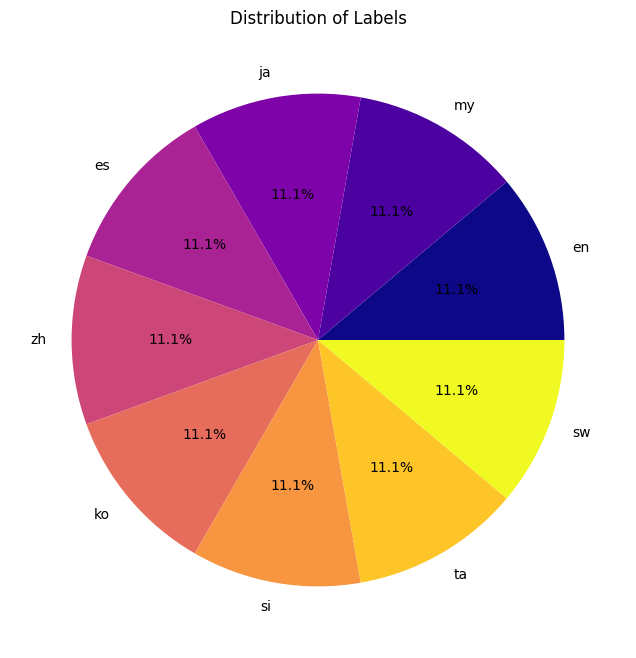

In [ ]:
import numpy as np
counts = df['Label'].value_counts()
labels = counts.index

plt.figure(figsize=(13, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.plasma(np.linspace(0, 1, len(labels))))
plt.title('Distribution of Labels')
plt.show()

In [ ]:
languages_to_drop = ['en', 'ja', 'zh' , 'es', 'ko', 'sw']

df = df[~df['Label'].isin(languages_to_drop)]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,Data,Label
0,ဇီဝဗေဒ ပညာတွင် ဆင့်ကဲပြောင်းလဲမှုဖြစ်စဉ် သို့မ...,my
1,မျိုးရိုးလိုက်သည့် လက္ခဏာများတွင် ခန္ဓာဗေဒ ဆို...,my
2,ဆင့်ကဲပြောင်းလဲမှုသည် အစုအဖွဲ့အတွင်းတွင် မျိုး...,my
3,ထိုသို့ အပြောင်းအလဲများ ဖြစ်ရသည့် အကြောင်းမှာ ...,my
4,အီဗော်လူးရှင်းကြောင့် ဘိုးဘွားမိဘတူသော သက်ရှိမ...,my
...,...,...
29995,இவர் பண்டைய கிரேக்கத்தின் மிக முக்கியமான தடகள ...,ta
29996,இவரது தந்தையின் பெயர் டியோடிமஸ் (μος),ta
29997,"இவரது தடகள வெற்றிகளுக்கும் மேலாக, கி.மு 510 இல...",ta
29998,"ஒலிம்பிக் பந்தயம் நடக்கின்ற நாளில், நான்கு வயத...",ta


In [ ]:
print(f'Number of objects in the dataset: {df.shape[0]}')

label_type = list(df['Label'].unique())
print(f'Types of labels in the dataset: {label_type}')

df.replace('my', 0, inplace=True)
df.replace('si', 1, inplace=True)
df.replace('ta', 2, inplace=True)
df['Label'] = df['Label'].astype('int8')

Number of objects in the dataset: 30000
Types of labels in the dataset: ['my', 'si', 'ta']


In [ ]:
df

,Data,Label
0,ဇီဝဗေဒ ပညာတွင် ဆင့်ကဲပြောင်းလဲမှုဖြစ်စဉ် သို့မ...,0
1,မျိုးရိုးလိုက်သည့် လက္ခဏာများတွင် ခန္ဓာဗေဒ ဆို...,0
2,ဆင့်ကဲပြောင်းလဲမှုသည် အစုအဖွဲ့အတွင်းတွင် မျိုး...,0
3,ထိုသို့ အပြောင်းအလဲများ ဖြစ်ရသည့် အကြောင်းမှာ ...,0
4,အီဗော်လူးရှင်းကြောင့် ဘိုးဘွားမိဘတူသော သက်ရှိမ...,0
...,...,...
29995,இவர் பண்டைய கிரேக்கத்தின் மிக முக்கியமான தடகள ...,2
29996,இவரது தந்தையின் பெயர் டியோடிமஸ் (μος),2
29997,"இவரது தடகள வெற்றிகளுக்கும் மேலாக, கி.மு 510 இல...",2
29998,"ஒலிம்பிக் பந்தயம் நடக்கின்ற நாளில், நான்கு வயத...",2


In [ ]:
groups = df.groupby(by='Label').count().Data
CNT_my = groups[0]
CNT_si = groups[1]
CNT_ta = groups[2]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['my', 'si','ta'],
    y=[CNT_my, CNT_si , CNT_ta],
    marker_color='indianred',
    width=[0.4, 0.4]))

fig.update_layout(title='Classes and their number in the dataset', title_x=0.5)

In [ ]:
texts = df['Data']
labels = df['Label']

In [ ]:
texts.shape

(30000,)

In [ ]:
NUM_WORDS = 30000
MAX_TEXT_LEN = 100

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(texts)

In [ ]:
word_count = 50
keys = list(tokenizer.word_index.keys())[:word_count]
values = list(tokenizer.word_index.values())[:word_count]
list(zip(keys, values))

[('மற்றும்', 1),
 ('နှင့်', 2),
 ('හා', 3),
 ('වූ', 4),
 ('ஒரு', 5),
 ('ဖြစ်သည်', 6),
 ('විය', 7),
 ('හිට්ලර්', 8),
 ('ඔහු', 9),
 ('ලෙස', 10),
 ('අතර', 11),
 ('ရှိသည်', 12),
 ('ခုနှစ်', 13),
 ('ခုနှစ်တွင်', 14),
 ('ද', 15),
 ('දී', 16),
 ('සහ', 17),
 ('ඒ', 18),
 ('වූයේ', 19),
 ('මේ', 20),
 ('කොට', 21),
 ('බව', 22),
 ('වන', 23),
 ('இது', 24),
 ('ஆம்', 25),
 ('ජර්මන්', 26),
 ('කල', 27),
 ('ඇති', 28),
 ('විසින්', 29),
 ('இந்த', 30),
 ('සිටි', 31),
 ('තම', 32),
 ('කරන', 33),
 ('එය', 34),
 ('නම්', 35),
 ('பல', 36),
 ('සඳහා', 37),
 ('හමුදා', 38),
 ('இல்', 39),
 ('සිය', 40),
 ('තුල', 41),
 ('යුද', 42),
 ('එහෙත්', 43),
 ('මෙම', 44),
 ('என்ற', 45),
 ('အဖြစ်', 46),
 ('என்று', 47),
 ('නිසා', 48),
 ('ဖြစ်ပြီး', 49),
 ('ගේ', 50)]

In [ ]:
sequences = tokenizer.texts_to_sequences(texts)

# As a result, the text under the following index was converted to a vector
index = 6
print(texts[index])
print(sequences[index])

X = pad_sequences(sequences, maxlen=MAX_TEXT_LEN)  # Standardization of the number of elements in a vector
y = labels.copy()

ထိုသို့ အမျိုးအနွယ်တစ်ခုမှ တစ်ခုသို့ အဆက်မပြတ် ပြောင်းလဲခြင်းကြောင့် ရှေးကရှိခဲ့ဘူး သော တိရစ္ဆာန်၊ သို့မဟုတ် အပင်နှင့် ယခုအခါ ရှိနေသော တိရစ္ဆာန်၊ သို့မဟုတ် အပင်သည် မတူနိုင်တော့ချေ
[376, 15462, 8336, 21524, 763, 5133, 160, 2152, 1265, 4662, 5133, 160, 15463]


In [ ]:
sequences_len = []
for sequence in sequences:
    seq_len = len(sequence)
    sequences_len.append(seq_len)

fig = go.Figure(data=[go.Histogram(x=sequences_len, marker_color='indianred')])
fig.update_layout(title='Histogram of the length of texts', title_x=0.5,xaxis_title="Text length",
                  yaxis_title="Count")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(f'Training sample size: {len(X_train)}')
print(f'Test sample size: {len(X_test)}')

Training sample size: 24000
Test sample size: 6000


# Modeling

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score , accuracy_score

In [ ]:
#A recurrent neural network (RNN) model with an LSTM layer ()
import tensorflow as tf
from tensorflow.keras import layers
EMBEDDING_DIM = 100

model = tf.keras.Sequential([
    layers.Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_TEXT_LEN),
    layers.LSTM(units=64),  # Or other RNN layers like GRU
    layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
750/750 [==============================] - 117s 146ms/step - loss: 0.1303 - accuracy: 0.9495 - val_loss: 0.0127 - val_accuracy: 0.9965
Epoch 2/10
750/750 [==============================] - 95s 126ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.0155 - val_accuracy: 0.9948
Epoch 3/10
750/750 [==============================] - 90s 120ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0103 - val_accuracy: 0.9965
Epoch 4/10
750/750 [==============================] - 91s 121ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0111 - val_accuracy: 0.9965
Epoch 5/10
750/750 [==============================] - 89s 119ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0125 - val_accuracy: 0.9965
Epoch 6/10
750/750 [==============================] - 91s 121ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0097 - val_accuracy: 0.9970
Epoch 7/10
750/750 [==============================] - 88s 118ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0100 - val_a

In [ ]:
'''#Naive Bayes classifier ML model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model =model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy_score:', accuracy)
print('F1-score:', f1)
print('Recall_score:', recall)
print('Precision_score:', precision)'''

"#Naive Bayes classifier ML model\nfrom sklearn.naive_bayes import MultinomialNB\nmodel = MultinomialNB()\nmodel =model.fit(X_train, y_train)\ny_pred = model.predict(X_test)\n\nf1 = f1_score(y_test, y_pred, average='weighted')\nrecall = recall_score(y_test, y_pred, average='weighted')\nprecision = precision_score(y_test, y_pred, average='weighted')\naccuracy = accuracy_score(y_test, y_pred)\n\nprint('Accuracy_score:', accuracy)\nprint('F1-score:', f1)\nprint('Recall_score:', recall)\nprint('Precision_score:', precision)"

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy_score:', accuracy)
print('F1-score:', f1)
print('Recall_score:', recall)
print('Precision_score:', precision)'''

"from sklearn.ensemble import RandomForestClassifier\nrf_model = RandomForestClassifier(n_estimators=100)\nrf_model.fit(X_train, y_train)\n\ny_pred = rf_model.predict(X_test)\n\nf1 = f1_score(y_test, y_pred, average='weighted')\nrecall = recall_score(y_test, y_pred, average='weighted')\nprecision = precision_score(y_test, y_pred, average='weighted')\naccuracy = accuracy_score(y_test, y_pred)\n\nprint('Accuracy_score:', accuracy)\nprint('F1-score:', f1)\nprint('Recall_score:', recall)\nprint('Precision_score:', precision)"

In [ ]:
'''from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy_score:', accuracy)
print('F1-score:', f1)
print('Recall_score:', recall)
print('Precision_score:', precision)'''

"from sklearn.linear_model import LogisticRegression\nlr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')\n\nlr_model.fit(X_train, y_train)\ny_pred = lr_model.predict(X_test)\n\nf1 = f1_score(y_test, y_pred, average='weighted')\nrecall = recall_score(y_test, y_pred, average='weighted')\nprecision = precision_score(y_test, y_pred, average='weighted')\naccuracy = accuracy_score(y_test, y_pred)\n\nprint('Accuracy_score:', accuracy)\nprint('F1-score:', f1)\nprint('Recall_score:', recall)\nprint('Precision_score:', precision)"

<ipython-input-29-d9e69c8217d3>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



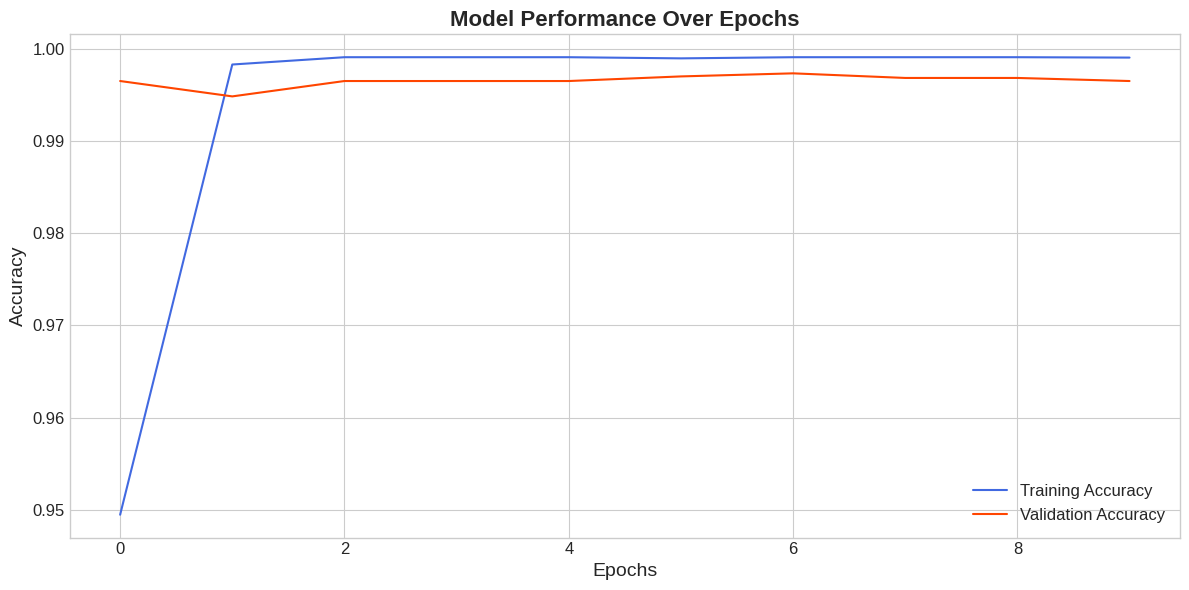

In [ ]:
import matplotlib.pyplot as plt

# Create a visually striking and informative plot
plt.figure(figsize=(12, 6))  # Size adjusted for visual clarity
plt.style.use('seaborn-whitegrid')  # Apply a visual style for aesthetics

plt.plot(history.history['accuracy'], label='Training Accuracy', color='royalblue')  # Enhanced label clarity
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orangered')

plt.title('Model Performance Over Epochs', fontsize=16, fontweight='bold')  # Clear and concise title
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.legend(fontsize=12)

plt.tight_layout()  # Ensure optimal spacing for readability
plt.show()


In [ ]:
print(f'Metric on test: {model.evaluate(X_test, y_test)}')
print(f'Metric on train: {model.evaluate(X_train, y_train)}')

188/188 [==============================] - 4s 19ms/step - loss: 0.0098 - accuracy: 0.9965
Metric on test: [0.009754500351846218, 0.9965000152587891]
750/750 [==============================] - 16s 22ms/step - loss: 0.0037 - accuracy: 0.9991
Metric on train: [0.0037310183979570866, 0.9990833401679993]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 3042435 (11.61 MB)
Trainable params: 3042435 (11.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis =1)
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

188/188 [==============================] - 5s 21ms/step
[[1998    0    4]
 [  10 1986    0]
 [   7    0 1995]]


In [ ]:
f1 = f1_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

print('Accuracy_score:', accuracy)
print('F1-score:', f1)
print('Recall_score:', recall)
print('Precision_score:', precision)

Accuracy_score: 0.9965
F1-score: 0.9965028833515414
Recall_score: 0.9965
Precision_score: 0.9965172790696424


In [ ]:
model.save('language_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
Loaded_model = tf.keras.models.load_model('/content/language_classification.h5')

In [ ]:
def ml_pipeline(text: str) -> str:
    """Model prediction function for three-languages prediction"""
    try:
        sequence = tokenizer.texts_to_sequences([text])
        sequence = pad_sequences(sequence, maxlen=MAX_TEXT_LEN)

        if sequence.max() == 0:
            return 'Enter texts of Burmese,Sinhala and Tamil'

        predict = Loaded_model.predict(sequence, verbose=0)  # Get class probabilities
        predicted_class = np.argmax(predict)  # Determine the most probable class

        if predicted_class == 0:
            return 'Burmese'  # Replace with your actual class labels
        elif predicted_class == 1:
            return 'Sinhala'
        else:
            return 'Tamil'

    except AttributeError:
        return 'Enter the text'


In [ ]:
ml_pipeline('ဇီဝဗေဒ ပညာတွင် ဆင့်ကဲပြောင်းလဲမှုဖြစ်စဉ်')

'Burmese'

In [ ]:
ml_pipeline('අද්මිරාල්')

'Sinhala'

In [ ]:
ml_pipeline('இக்கட்டுரை தமிழ் மொழி பற்றியது. ஏனைய பயன்பாடுகளுக்குத்')

'Tamil'

In [ ]:
ml_pipeline('How can you define Love?')

'Enter texts of Burmese,Sinhala and Tamil'

In [ ]:
ml_pipeline('လေယာဉ်ပျံ')

'Burmese'

In [ ]:
ml_pipeline('ဒီမိုကရေစီ')

'Burmese'